__Agenda__

1. Introduction to unsupervised learning

2. Clustering

3. Kmeans algorithm details

4. Implementation of kmeans with sklearn

5. How to choose number of clusters: Silhouette & Calinski-Harabasz score

6. Challenge

7. An interesting application of the kmeans algorithm with image processing.

8. Summary

# Unsupervised Learning

- Association Rules

- Cluster Analysis

- Principal Components, Curves and Surfaces

- Indepedent Component Analysis

- Multidimensional Scaling

- Non-linear Dimension Reduction

<img src="img/map_of_ml.png" width=650, height=650> 

[Img source](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)


## Clustering

A clustering problem is where you want to discover the inherent groupings in the data.

## K-Means  Algorithm


<img src="img/kmeans.png" width=650, height=650> 


[Let's see kmeans in action](https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)


[This notebook is motivated from](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html)

In [22]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pickle
%matplotlib inline

In [23]:
np.random.seed(110119)

X, y = make_blobs(n_samples=700, n_features=2, centers=4, cluster_std=.5)
# the smaller the cluster_std, the tighter my clusters

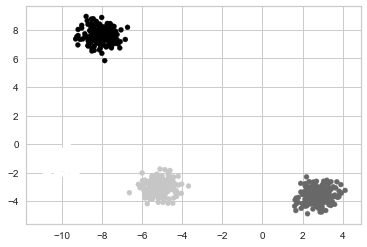

In [24]:
# can you plot this dataset

plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

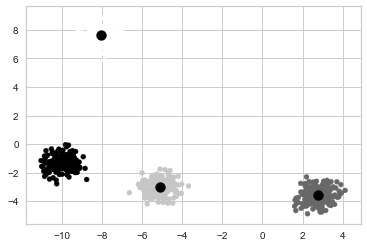

In [25]:
# let's instantiate kmeans algorithm
# don't forget to check its parameters
k_means = KMeans(n_clusters=4)

# dont forget to fit the model!
k_means.fit(X)

# we make a prediction for each point
y_hat = k_means.predict(X)

# we can access the coordinates of the cluster centers by cluster_centers_ method
cl_centers = k_means.cluster_centers_

# note that the colors are different - Is this a problem?
plt.scatter(X[:, 0], X[:, 1], c=y_hat, s=25)


# also let's mark the cluster centers too.
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100)

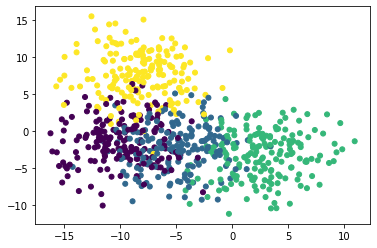

In [10]:
np.random.seed(110119)

X, y = make_blobs(n_samples=700, n_features=2, centers=4, cluster_std=3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

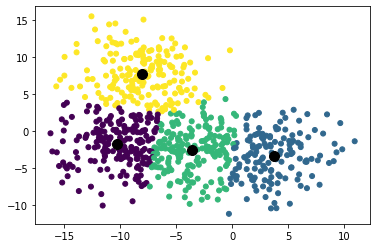

In [11]:
# let's instantiate kmeans algorithm
# don't forget to check its parameters
k_means = KMeans(n_clusters=4)

# dont forget to fit the model!
k_means.fit(X)

# we make a prediction for each point
y_hat = k_means.predict(X)

# we can access the coordinates of the cluster centers by cluster_centers_ method
cl_centers = k_means.cluster_centers_

# note that the colors are different - Is this a problem?
plt.scatter(X[:, 0], X[:, 1], c=y_hat, s=25)


# also let's mark the cluster centers too.
plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100)

__Your Turn__

- Guess how many cluster are there in the figure below.

- Use kmeans to find clusters.

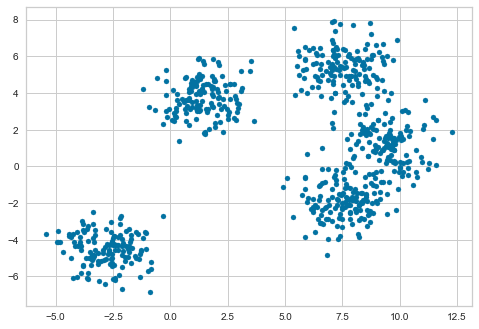

In [17]:
dbfile = open('blobs_1.obj', 'rb')
data = pickle.load(dbfile)

X = data[0]

# can you plot this dataset

plt.scatter(X[:, 0], X[:, 1], s=25)

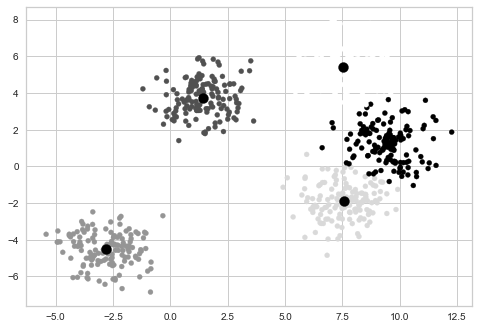

In [18]:

k_means = KMeans(n_clusters=5)
k_means.fit(X)
y_hat = k_means.predict(X)
cl_centers = k_means.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=y_hat, s=25)

plt.scatter(cl_centers[:, 0], cl_centers[:, 1], c='black', s=100)

__Compare your results with the actual values below.__

- Do they close to the actual values?

- What might go wrong?



In [12]:
# let's play with cluster_std and try to find number of clusters

np.random.seed(110119)

X, y = make_blobs(n_samples=700, n_features=2, centers=np.array([[-10, -20],
                                                                 [-5, -15],
                                                                 [-2, -9],
                                                                 [5, 12],
                                                                 [7, 17]
                                                                 ]), cluster_std=5)

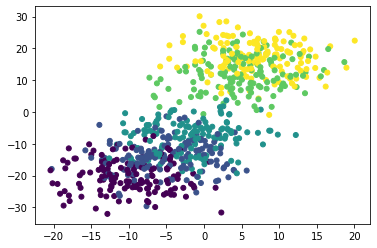

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=25)

Q: How do we find optimal K value?

[Metrics](https://scikit-learn.org/stable/modules/clustering.html#k-mean)

[Calinski_Harabasz](https://scikit-learn.org/stable/modules/clustering.html#calinski-harabasz-index)

[Silhoutte Coefficients](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient)

In [ ]:
# !pip install yellowbrick

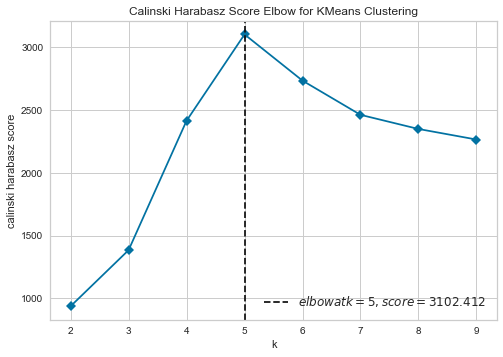

In [19]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='calinski_harabasz', timings=False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

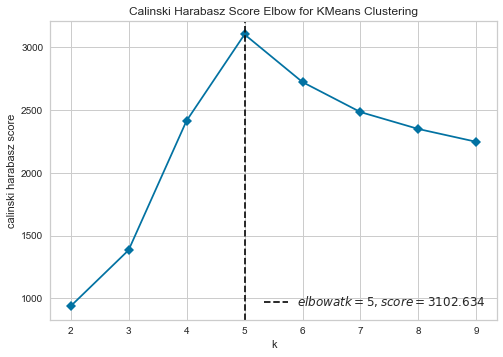

In [20]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='calinski_harabasz', timings=False
)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

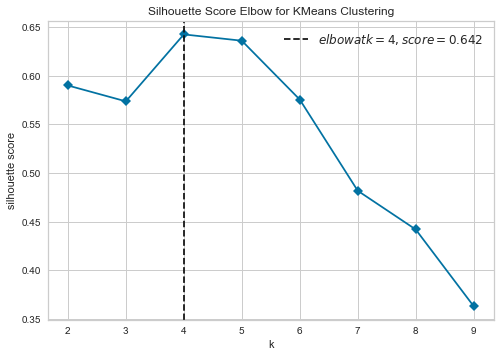

In [21]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model,
                              k=(2, 10),
                              metric='silhouette',
                              timings=False,
                              locate_elbow=True)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

[Yellowbrick API](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

## Hierarchical Clustering in action

**[This post here](https://www.analyticsvidhya.com/blog/2019/05/beginners-guide-hierarchical-clustering/)** walks through cluster assignment _step_ by _step_ if the demo would be helpful.

Meanwhile, we can do it in _**scipy**_ and _**sklearn**_

### Hierarchical clustering with `scipy`

(100, 2)


Text(0.5, 1.0, 'Sample data for clustering demo')

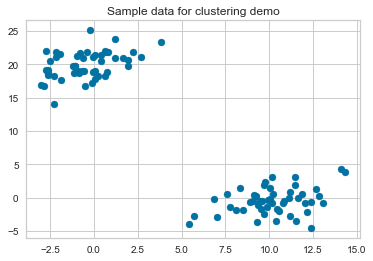

In [26]:
# lets generate some data and look at an example of hierarchical agglomerative clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# generate two clusters: a with 100 points, b with 50:
np.random.seed(1000)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[50, ])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50, ])
X = np.concatenate((a, b),)
print(X.shape)  # 150 samples with 2 dimensions
plt.scatter(X[:, 0], X[:, 1])
plt.title("Sample data for clustering demo")

In [27]:
# construct dendrogram in scipy
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'single')

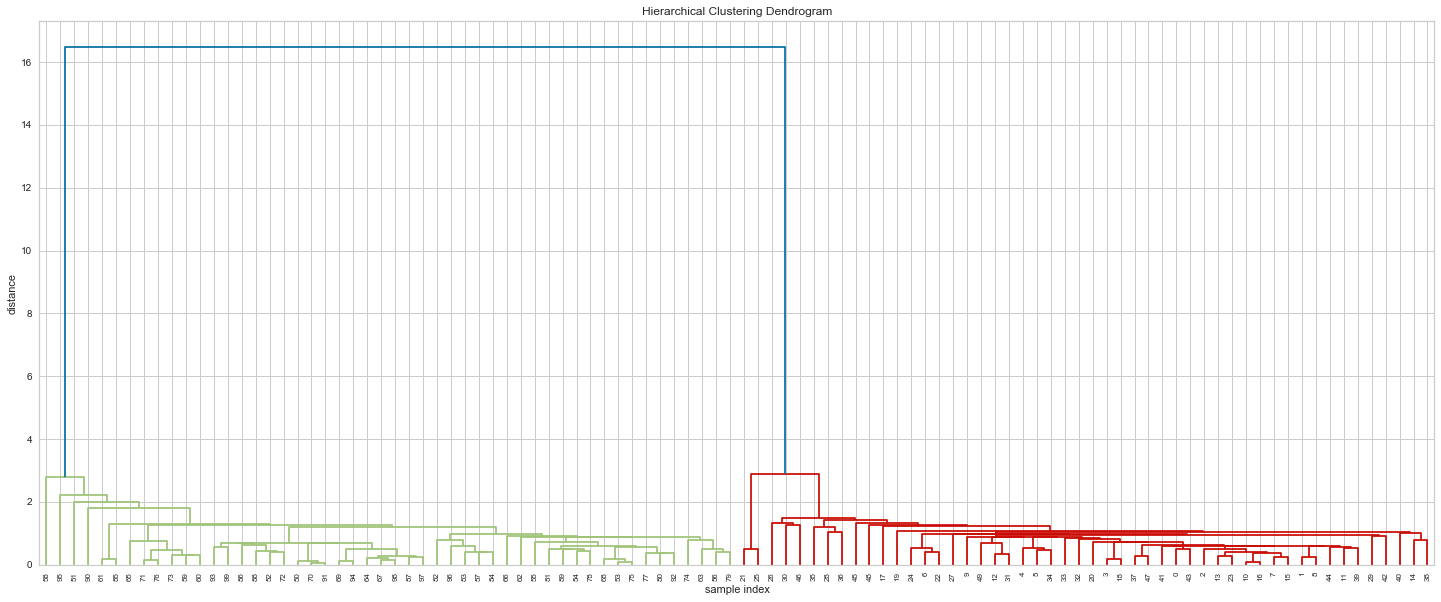

In [28]:
# calculate and construct the dendrogram
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

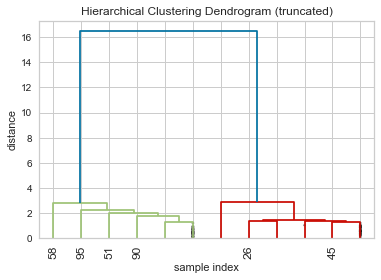

In [29]:
# trimming and truncating the dendrogram
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# from documentation of "lastp"
# The last p non-singleton formed in the linkage are the only non-leaf nodes in the linkage;
# they correspond to rows Z[n-p-2:end] in Z. All other non-singleton clusters are contracted into leaf nodes.

In [ ]:
# This shows the same exact thing, but cleaned up a bit.

### Hierarchical clustering with `sklearn` on Iris (because it's there)

**[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)** for AgglomerativeClustering in `sklearn`


**[A great example of using manhattan distance](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_clustering_metrics.html#sphx-glr-auto-examples-cluster-plot-agglomerative-clustering-metrics-py)** with agglomerative clustering in `sklearn`.

In [ ]:
# we can also use the scikitlearn module hierarchical clustering to perform the same task
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import KernelDensity
np.random.seed(2000)

In [ ]:
# try clustering on the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
# in this case, we won't be working with predicting labels, so we will only use the features (X)
X_iris = iris.data
y_iris = iris.target

In [ ]:
plt.scatter(X_iris[:, 0], X_iris[:, 2])  # c = y_iris)

In [ ]:
iris_cluster = AgglomerativeClustering(n_clusters=3)
iris_cluster
pred_iris_clust = iris_cluster.fit_predict(X_iris)
plt.scatter(X_iris[:, 0], X_iris[:, 2], c=pred_iris_clust, s=10)

In [ ]:
# compare it to the actual truth
plt.scatter(X_iris[:, 0], X_iris[:, 2], c=y_iris)

#### Evaluate

To evaluate you might try different numbers of clusters and compare their silhouette score as you did w kmeans.

In [ ]:
# evaluation - silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(X_iris, pred_iris_clust)

### Evaluating number of clusters / Cut points
For hierarchical agglomerative clustering, or clustering in general, it is generally difficult to truly evaluate the results. Therefore, it is up you, the data scientists, to decide.

**[Standford has a good explaination on page 380](https://nlp.stanford.edu/IR-book/pdf/17hier.pdf)** of your options for picking the cut-off. 

When we are viewing dendrograms for hierarchical agglomerative, we can visually examine where the natural cutoff is, despite it not sounding exactly statistical, or scientific. We might want to interpret the clusters and assign meanings to them depending on domain-specific knowledge and shape of dendrogram. However, we can evaluate the quality of our clusters using measurements such as Sihouette score discussed in the k-means lectures. 



## Advantages & Disadvantages of hierarchical clustering

#### Advantages
- Intuitive and easy to implement
- More informative than k-means because it takes individual relationship into consideration
- Allows us to look at dendrogram and decide number of clusters

#### Disadvantages
- Very sensitive to outliers
- Cannot undo the previous merge, which might lead to problems later on 


### Further reading

- [from MIT on just hierarchical](http://web.mit.edu/6.S097/www/resources/Hierarchical.pdf)
- [from MIT comparing clustering methods](http://www.mit.edu/~9.54/fall14/slides/Class13.pdf)
- [fun CMU slides on clustering](http://www.cs.cmu.edu/afs/andrew/course/15/381-f08/www/lectures/clustering.pdf)

### Find those clusters!!! 

In [ ]:
shop = pd.read_excel('Online Retail.xlsx')

## Geo clustering

In [34]:
df = pd.read_csv('data/Clustering Worksheet - Trips.csv')

df.columns = ['name', 'city_name', 'lat', 'lon']
df.head()

,name,city_name,lat,lon
0,Andy,"New Orleans, LA",29.951,-90.072
1,Lindsey,"Houston, TX",29.760,-95.370
2,Ammar,"Washington, DC",38.907,-77.037
3,Abdoul Aziz,"Paris, FR",48.857,2.352
4,Adebodun,"Jersey City, NJ",40.718,-74.043


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


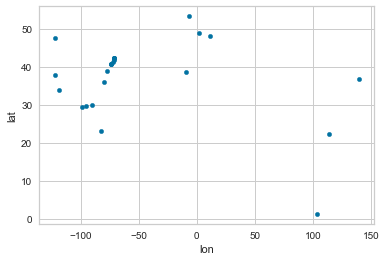

In [37]:
df.plot('lon', 'lat', kind='scatter')

In [41]:
# create clusters, .values get it into numpy structure
X = df[['lon','lat']].values

In [42]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [43]:
X_ss

array([[-0.60695156, -0.70096496],
       [-0.68194089, -0.71935819],
       [-0.42245064,  0.16149447],
       [ 0.70124279,  1.11967573],
       [-0.38007275,  0.33589309],
       [-0.46144566, -0.11141867],
       [-0.33702961,  0.48371301],
       [ 0.5793462 ,  1.55234994],
       [-0.34284702,  0.44240047],
       [-1.06356835,  0.9992049 ],
       [ 2.28393091, -1.4359237 ],
       [-1.00570569, -0.30604021],
       [-0.72615883, -0.75171487],
       [-0.35441106,  0.39704335],
       [ 2.13744836, -3.45503792],
       [-1.06479977,  0.0524833 ],
       [-0.33783641,  0.49401707],
       [-0.4978929 , -1.35936549],
       [-0.37867148,  0.3320411 ],
       [ 0.53859606,  0.14367904],
       [-0.33783641,  0.49401707],
       [-0.33855827,  0.49536527],
       [ 0.83188671,  1.0501474 ],
       [-0.37954904,  0.33541159],
       [ 2.6452753 , -0.04911281]])

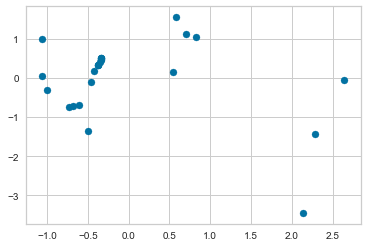

In [44]:
# the distribution looks the same - SS doesn't change shape of the data.
plt.scatter(X_ss[:, 0], X_ss[:, 1])

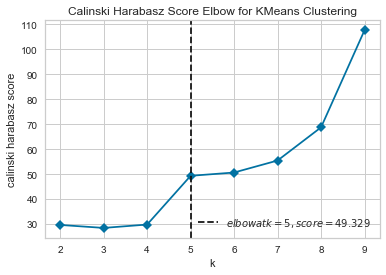

In [47]:
model = KMeans()

visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='calinski_harabasz', timings=False)

visualizer.fit(X_ss)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [48]:
# 5 is the best elbow for X_ss

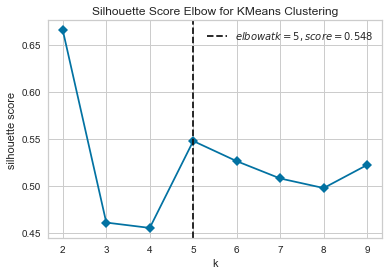

In [50]:
model = KMeans()

visualizer = KElbowVisualizer(
    model, k=(2, 10), metric='silhouette', timings=False)

visualizer.fit(X_ss)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [55]:
model = KMeans(n_clusters=5)
model.fit(X_ss)
y_pred = model.predict(X_ss)

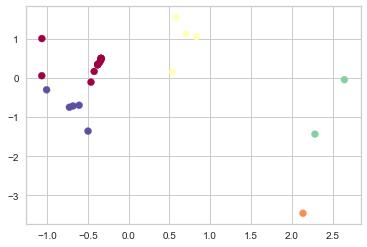

In [56]:
plt.scatter(X_ss[:, 0], X_ss[:, 1], c=y_pred, cmap='Spectral')